In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn import metrics
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.cross_decomposition import PLSRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# correlation
from scipy.stats import pearsonr

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Exploratory data analysis

In [2]:
# import data
data = pd.read_csv("sanger1018_brainarray_ensemblgene_rma.txt", sep='\t')
cellline = pd.read_excel("Cell_Lines_Details.xlsx")
dose = pd.read_excel("v17.3_fitted_dose_response.xlsx")

In [3]:
data.head()

,ensembl_gene,906826,687983,910927,1240138,1240139,906792,910688,1240135,1290812,...,753584,907044,998184,908145,1659787,1298157,1480372,1298533,930299,905954.1
0,ENSG00000000003,7.632023,7.548671,8.712338,7.797142,7.729268,7.074533,3.285198,6.961606,5.943046,...,7.105637,3.236503,3.038892,8.373223,6.932178,8.441628,8.422922,8.089255,3.112333,7.153127
1,ENSG00000000005,2.964585,2.777716,2.643508,2.817923,2.957739,2.889677,2.828203,2.874751,2.686874,...,2.798847,2.745137,2.976406,2.852552,2.622630,2.639276,2.879890,2.521169,2.870468,2.834285
2,ENSG00000000419,10.379553,11.807341,9.880733,9.883471,10.418840,9.773987,10.264385,10.205931,10.299757,...,10.486486,10.442951,10.311962,10.454830,10.418475,11.463742,10.557777,10.792750,9.873902,10.788218
3,ENSG00000000457,3.614794,4.066887,3.956230,4.063701,4.341500,4.270903,5.968168,3.715033,3.848112,...,3.696835,4.624013,4.348524,3.858121,3.947561,4.425849,3.550390,4.443337,4.266828,4.100493
4,ENSG00000000460,3.380681,3.732485,3.236620,3.558414,3.840373,3.815055,3.011867,3.268449,3.352835,...,3.726833,3.947744,3.806584,3.196988,3.814831,4.384732,4.247189,3.071359,3.230197,3.435795


In [4]:
cellline.head()

,Sample Name,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug Response,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties
0,A253,906794,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,NaN,MSS/MSI-L,D/F12,Adherent
1,BB30-HNC,753531,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
2,BB49-HNC,753532,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
3,BHY,753535,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
4,BICR10,1290724,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent


In [5]:
dose.head()

,DATASET_VERSION,IC50_RESULTS_ID,COSMIC_ID,CELL_LINE_NAME,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,MAX_CONC_MICROMOLAR,MIN_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,Z_SCORE
0,17.3,1,683665,MC-CAR,1,Erlotinib,EGFR,2.0,0.007812,2.453524,0.982610,0.021678,-0.015505
1,17.3,1482,684055,ES3,1,Erlotinib,EGFR,2.0,0.007812,3.376592,0.985169,0.029915,0.779999
2,17.3,1791,684057,ES5,1,Erlotinib,EGFR,2.0,0.007812,3.614664,0.983207,0.031201,0.985170
3,17.3,2177,684059,ES7,1,Erlotinib,EGFR,2.0,0.007812,3.223394,0.984574,0.093857,0.647971
4,17.3,2754,684062,EW-11,1,Erlotinib,EGFR,2.0,0.007812,2.486405,0.946034,0.087280,0.012832


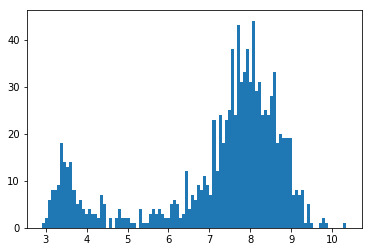

,906826,687983,910927,1240138,1240139,906792,910688,1240135,1290812,907045,...,753584,907044,998184,908145,1659787,1298157,1480372,1298533,930299,905954.1
count,17737.000000,17737.000000,17737.000000,17737.000000,17737.000000,17737.000000,17737.000000,17737.000000,17737.000000,17737.000000,...,17737.000000,17737.000000,17737.000000,17737.000000,17737.000000,17737.000000,17737.000000,17737.000000,17737.000000,17737.000000
mean,4.808463,4.838664,4.818025,4.795847,4.795496,4.806377,4.818078,4.803062,4.781738,4.821827,...,4.777359,4.825211,4.820602,4.785600,4.805981,4.815682,4.825324,4.811721,4.826543,4.797118
std,2.198189,2.194323,2.190716,2.147864,2.183026,2.181450,2.161495,2.173793,2.149506,2.151691,...,2.127612,2.169103,2.164302,2.129048,2.163453,2.143644,2.182659,2.088979,2.162140,2.171107
min,2.305607,2.319578,2.336857,2.229853,2.355002,2.404299,2.359748,2.292669,2.270668,2.283999,...,2.237944,2.285672,2.417108,2.346146,2.317703,2.374099,2.332276,2.289696,2.210502,2.259880
25%,3.062916,3.072005,3.022276,3.076313,3.050912,3.069891,3.110310,3.070414,3.077905,3.147134,...,3.134784,3.146745,3.110995,3.111314,3.133682,3.129917,3.102273,3.147556,3.097004,3.111973
50%,3.820886,3.881211,3.897772,3.880269,3.822766,3.818058,3.826705,3.842829,3.812169,3.814951,...,3.771652,3.772415,3.814650,3.823512,3.788640,3.830921,3.841504,3.919759,3.911423,3.769026
75%,6.214114,6.280168,6.267543,6.146817,6.217217,6.209509,6.207517,6.183827,6.167666,6.196833,...,6.103094,6.246604,6.250704,6.122535,6.163146,6.181719,6.208098,6.114570,6.190047,6.135005
max,13.361046,13.256199,13.430167,13.359095,13.463462,13.281024,13.344702,13.115546,13.399420,13.369887,...,13.173505,13.507702,13.325943,13.332472,13.440504,13.333837,13.515157,13.255737,13.309549,13.378528


In [6]:
# check distribution of features(genes)
plt.hist(data.iloc[7].tolist()[1:],100)
plt.show()
data.describe()

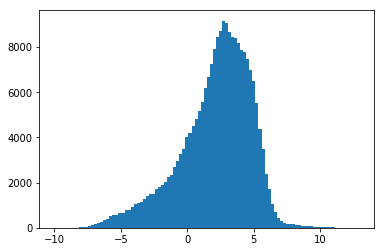

0.25    0.662618
0.50    2.545984
0.75    4.032219
Name: LN_IC50, dtype: float64 2.108973500544153 2.545984


In [7]:
# check the overall distribution of all IC50 over all drugs and all cell lines
#plt.hist(np.exp(dose.LN_IC50)[np.exp(dose.LN_IC50)<250], 200, normed=1, facecolor='g', alpha=0.75)
plt.hist(dose.LN_IC50, 100)
plt.show()
print(dose.LN_IC50.quantile([.25, .5, .75]), np.mean(dose.LN_IC50), np.median(dose.LN_IC50))

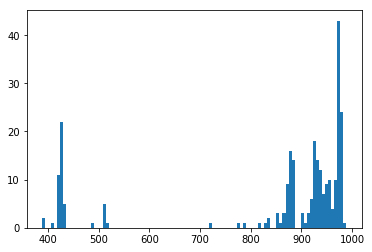

1494    989
230     980
152     980
225     980
203     980
221     980
211     980
208     979
228     979
223     979
238     979
Name: DRUG_ID, dtype: int64

In [8]:
## how many cell lines were drug tested on
plt.hist(dose.DRUG_ID.value_counts(),100)
plt.show()
dose.DRUG_ID.value_counts()[:11]

In [9]:
## Check the name of the high count drugs
drug_ids = dose.DRUG_ID.value_counts().index.tolist()
drug_counts = dose.DRUG_ID.value_counts()
drug_counts[drug_ids[0]]
dose.loc[dose['DRUG_ID'] == drug_ids[0]]['DRUG_NAME'].tolist()[0]
print(drug_ids[0], dose.loc[dose['DRUG_ID'] == drug_ids[0]]['DRUG_NAME'].tolist()[0])

1494 SN-38


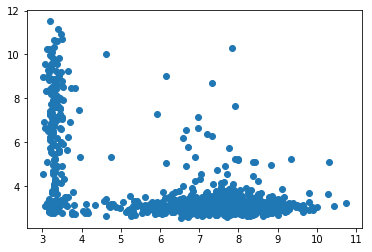

-0.6008224976479042


In [10]:
## Check the correlation between variables
## high correlation variables can be found at /results/correlated_genes.txt
id1 = 0
id2 = 48
plt.scatter(data.loc[id1,:].tolist()[1:], data.loc[id2,:].tolist()[1:])
plt.show()
print(pearsonr(data.loc[id1,:].tolist()[1:], data.loc[id2,:].tolist()[1:])[0])

### Test some different models using 5-fold cross validation (on training data)

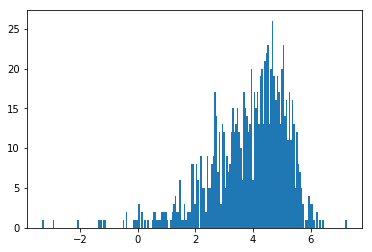

In [11]:
## one drug at a time
drug_id = 211
onedrug_dose = dose.loc[dose.DRUG_ID == drug_id]
plt.hist(onedrug_dose.LN_IC50, 200)
plt.show()

In [12]:
# one drug at a time
# select all cell lines that were tested on the drug
# select and sort rnaseq data by cell line order
onedrug_dose = dose.loc[dose.DRUG_ID == drug_id]
onedrug_ind = [str(x) for x in set(onedrug_dose.COSMIC_ID) if str(x) in data.columns and x in cellline['COSMIC identifier'].tolist()]

onedrug_cellline = cellline[cellline['COSMIC identifier'].isin(onedrug_ind)]
onedrug_data = data[['ensembl_gene'] + [i for i in onedrug_cellline['COSMIC identifier'].astype(str).tolist()]]
onedrug_dose = onedrug_dose[onedrug_dose['COSMIC_ID'].isin(onedrug_ind)]
onedrug_dose['sort'] = pd.Categorical(
    onedrug_dose['COSMIC_ID'].astype(str).tolist(), 
    categories=onedrug_data.columns.tolist(), 
    ordered=True
)
onedrug_dose = onedrug_dose.sort_values('sort')

#onedrug_dose = onedrug_dose.set_index('COSMIC_ID')
#onedrug_dose = onedrug_dose.loc[[i for i in onedrug_cellline['COSMIC identifier'].astype(str).tolist()]]

#plt.hist(onedrug_dose.LN_IC50, 200)
#plt.show()
#onedrug_data = data[data.columns.intersection(onedrug_ind)]
#onedrug_cellline = cellline[cellline.columns.intersection(onedrug_ind)]

In [13]:
print(len(onedrug_ind))
print(onedrug_cellline.shape)
print(onedrug_data.shape)
print(onedrug_dose.shape)

903
(903, 13)
(17737, 904)
(903, 14)


In [14]:
onedrug_data

,ensembl_gene,906794,753531,753532,753535,1290724,1240121,1290725,1240122,753538,...,1479987,1479988,1299052,1659817,1290767,1290768,1298157,1298160,1299061,1298218
0,ENSG00000000003,3.260514,6.085170,6.804459,7.987853,7.722962,6.419526,7.983569,7.646494,7.043881,...,6.793968,7.165787,8.439584,3.293176,7.281493,7.675404,8.441628,8.686600,7.480317,8.362924
1,ENSG00000000005,2.782798,2.840440,2.920016,2.665458,2.977843,3.182094,2.691112,2.626819,2.698753,...,2.736335,2.964092,2.788539,2.719466,2.764737,3.103105,2.639276,2.808921,3.070556,2.831272
2,ENSG00000000419,10.127946,10.374996,9.679912,10.779337,9.979404,9.320548,10.946952,10.153853,10.928503,...,9.658935,10.297087,9.998849,10.303324,9.807750,10.363883,11.463742,9.307499,9.925146,10.696233
3,ENSG00000000457,4.313884,4.047315,3.773164,3.838445,3.889085,3.759654,3.742934,3.564755,3.884052,...,3.890320,3.605084,4.958012,4.476928,4.000466,3.719575,4.425849,4.004441,4.303307,5.204037
4,ENSG00000000460,3.399067,3.209287,3.366119,3.383024,3.568863,3.802619,3.937556,3.942749,3.173287,...,3.245025,3.892586,3.716951,4.185209,3.085988,3.094497,4.384732,3.714197,3.654968,3.121726
5,ENSG00000000938,3.180589,3.131712,3.352411,3.112813,3.298585,3.215753,3.257590,3.290760,3.310988,...,3.302263,3.386814,3.229077,3.323484,3.303261,3.141884,3.229511,3.500512,3.235010,3.156705
6,ENSG00000000971,3.544131,3.800243,6.342530,5.939059,5.621657,4.698729,4.599649,3.551675,5.871991,...,3.630238,3.283378,3.065022,3.411030,6.062765,3.478029,3.571204,3.944138,3.258338,7.464734
7,ENSG00000001036,7.127068,6.300814,7.575470,7.481447,8.603029,7.873672,8.688658,8.252413,7.744656,...,7.258885,8.316955,6.921309,6.993451,8.263565,7.789035,8.193000,8.259752,8.117330,6.564028
8,ENSG00000001084,4.227078,6.247432,5.803498,6.190893,8.425177,6.468239,5.395583,5.831479,6.758341,...,4.551713,5.080891,7.707589,6.089451,4.338932,5.117950,5.671600,5.250503,5.238013,6.585097
9,ENSG00000001167,4.700226,5.937834,4.540939,4.306480,5.332800,5.396100,4.823219,4.716446,5.081162,...,4.925432,4.344039,4.733945,5.302222,5.037021,4.202900,4.943996,5.333334,4.775515,5.592746


In [15]:
onedrug_cellline

,Sample Name,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug Response,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties
0,A253,906794,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,NaN,MSS/MSI-L,D/F12,Adherent
1,BB30-HNC,753531,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
2,BB49-HNC,753532,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
3,BHY,753535,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
4,BICR10,1290724,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
5,BICR22,1240121,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
6,BICR31,1290725,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
7,BICR78,1240122,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
8,Ca9-22,753538,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
9,CAL-27,910916,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent


In [16]:
onedrug_dose

,DATASET_VERSION,IC50_RESULTS_ID,COSMIC_ID,CELL_LINE_NAME,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,MAX_CONC_MICROMOLAR,MIN_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,Z_SCORE,sort
65316,17.3,112094,906794,A253,211,TL-2-105,not defined,10.24,0.04,4.137578,0.975156,0.028004,0.210970,906794
65191,17.3,51165,753531,BB30-HNC,211,TL-2-105,not defined,10.24,0.04,3.491042,0.954383,0.022792,-0.271918,753531
65192,17.3,51482,753532,BB49-HNC,211,TL-2-105,not defined,10.24,0.04,5.744025,0.978195,0.034844,1.410803,753532
65195,17.3,52548,753535,BHY,211,TL-2-105,not defined,10.24,0.04,3.512961,0.952151,0.031723,-0.255548,753535
65872,17.3,381686,1290724,BICR10,211,TL-2-105,not defined,10.24,0.04,5.438546,0.985075,0.027607,1.182645,1290724
65778,17.3,340302,1240121,BICR22,211,TL-2-105,not defined,10.24,0.04,5.269001,0.983559,0.030561,1.056015,1240121
65873,17.3,382194,1290725,BICR31,211,TL-2-105,not defined,10.24,0.04,4.871591,0.985943,0.021570,0.759195,1290725
65779,17.3,340830,1240122,BICR78,211,TL-2-105,not defined,10.24,0.04,5.294593,0.983655,0.030332,1.075129,1240122
65197,17.3,53139,753538,Ca9-22,211,TL-2-105,not defined,10.24,0.04,4.376085,0.984689,0.031440,0.389108,753538
65667,17.3,286045,910916,CAL-27,211,TL-2-105,not defined,10.24,0.04,4.687246,0.982576,0.023350,0.621510,910916


In [17]:
# stratifiy the data based on GDSC Tissue descriptor, TCGA label, and Screen Medium
temp = onedrug_cellline['Cancer Type\n(matching TCGA label)'].astype(str) + onedrug_cellline['Screen Medium'].astype(str)
stratified_category = temp.replace(temp.value_counts().index[temp.value_counts() == 1], ['one'] * np.sum(temp.value_counts() == 1))

X = onedrug_data.drop(['ensembl_gene'], axis=1).T
y = np.array(onedrug_dose['LN_IC50'].tolist())
skf = StratifiedKFold(n_splits=5)

In [19]:
from sklearn.cross_decomposition import PLSRegression
for train_index, test_index in skf.split(X, stratified_category):
    X_train, X_test = X.iloc[train_index , : ], X.iloc[test_index , : ]
    y_train, y_test = y[train_index], y[test_index]
    
    model = PLSRegression(n_components=10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__, mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) )

PLSRegression 1.522238758943326 0.27058965742624164
PLSRegression 1.2444859258902508 0.3226262249537405
PLSRegression 1.2697765330714155 0.18012065198163518
PLSRegression 1.1633833894516903 0.29795972929021675
PLSRegression 1.3036852644119794 0.24286467223898534


In [ ]:
## 5-fold cross validation for different regression models
for train_index, test_index in skf.split(X, stratified_category):
    X_train, X_test = X.iloc[train_index , : ], X.iloc[test_index , : ]
    y_train, y_test = y[train_index], y[test_index]
    #print('Train:', y_train.value_counts())
    #print('Test', y_test.value_counts())
    
    model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('RF:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) )
    
    ind = np.argsort(model.feature_importances_)[-50:]
    X_train_subset = X_train.iloc[:, ind]
    X_test_subset = X_test.iloc[:, ind]
    
    model.fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)
    print('RF_50:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) )

    model = linear_model.Lasso(alpha=0.1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Lasso:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) )

    model.fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)
    print('Lasso_50:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) )
    
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('KNN:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) )

    model.fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)
    print('KNN_50:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) )

    model = AdaBoostRegressor(random_state=0, n_estimators=100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('AdaBoost:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) )

    model.fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)
    print('AdaBoost_50:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) )
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('LM:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) )
     
    model.fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)
    print('LM_50:', mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) )
 
    print('BL:', np.sum((y_test - np.median(y_test)) ** 2) / y_test.shape[0], '\n')

### Save model information

In [23]:
# save example as patient info for the web app
import csv
x = data[['ensembl_gene', '687807']]
x.to_csv('patient3.csv', encoding='utf-8', index=False)

# read in the saved file to varify
df = pd.read_csv('patient3.csv', header=None, index_col=0)
df.loc[['ENSG00000000005', 'ENSG00000000430']]

,1
0,
ENSG00000000005,2.845976
ENSG00000000430,NaN


In [31]:
# save the most important features for model to select
from os import listdir
from os.path import isfile, join
import json

# read in the saved single model configuration and concatenate them together
confs = {}
model_dir = '/Users/YaoSen/Desktop/insight/conf/'
model_paths = [join(model_dir, f) for f in listdir(model_dir) if isfile(join(model_dir, f))]
for i in model_paths: 
    with open(i) as data_file:
        js = json.load(data_file)
        confs = {**confs, **js}
    
# save the configurations as one file
with open('/Users/YaoSen/Desktop/insight_project/dash/conf/parms.json', 'w') as outfile:
    json.dump(confs, outfile)
    
# read the one configuration file in to varify
with open('/Users/YaoSen/Desktop/insight_project/dash/conf/parms.json') as infile:
    params = json.load(infile)

In [32]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# read the model back in to varify
from sklearn.externals import joblib
model = joblib.load('finalized_model.sav')

### Validate different models on test data

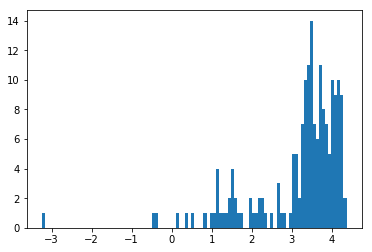

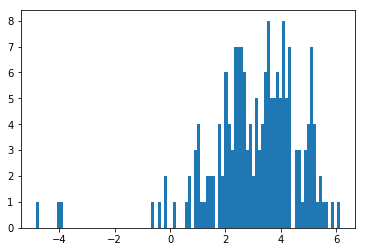

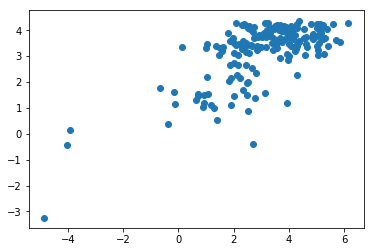

In [33]:
drug_id = 261
onedrug_name = dose.loc[dose['DRUG_ID'] == drug_id]['DRUG_NAME'].tolist()[0]
onedrug_dose = dose.loc[dose.DRUG_ID == drug_id]

# select all cell lines that were tested on the drug
# select and sort rnaseq data by cell line order
onedrug_dose = dose.loc[dose.DRUG_ID == drug_id]
onedrug_ind = [str(x) for x in set(onedrug_dose.COSMIC_ID) if str(x) in data.columns and x in cellline['COSMIC identifier'].tolist()]

onedrug_cellline = cellline[cellline['COSMIC identifier'].isin(onedrug_ind)]
onedrug_data = data[['ensembl_gene'] + [i for i in onedrug_cellline['COSMIC identifier'].astype(str).tolist()]]
onedrug_dose = onedrug_dose[onedrug_dose['COSMIC_ID'].isin(onedrug_ind)]
onedrug_dose['sort'] = pd.Categorical(
    onedrug_dose['COSMIC_ID'].astype(str).tolist(),
    categories=onedrug_data.columns.tolist(),
    ordered=True
)
onedrug_dose = onedrug_dose.sort_values('sort')


temp = onedrug_cellline['Cancer Type\n(matching TCGA label)'].astype(str) + onedrug_cellline['Screen Medium'].astype(str)
stratified_category = temp.replace(temp.value_counts().index[temp.value_counts() == 1], ['nanR'] * np.sum(temp.value_counts() == 1))

## First random forest
X = onedrug_data.drop(['ensembl_gene'], axis=1).T
y = np.array(onedrug_dose['LN_IC50'].tolist())

## 20/80 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=stratified_category) # test size 20%

model = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
model.fit(X_train, y_train)

## save important genes
importance_idx = np.argsort(model.feature_importances_)
important_genes = {onedrug_name: onedrug_data['ensembl_gene'][importance_idx[-50:]].tolist()}
#filepath = './conf/'+ onedrug_name + '.json'
#with open(filepath, 'w') as outfile:
#    json.dump(important_genes, outfile)

## second random forest
X_train_subset = X_train.iloc[:, importance_idx[-100:]]
X_test_subset = X_test.iloc[:, importance_idx[-100:]]
model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=200)
model.fit(X_train_subset, y_train)
y_pred = model.predict(X_test_subset)

plt.hist(y_pred,100)
plt.show()
plt.hist(y_test,100)
plt.show()
plt.scatter(y_test, y_pred)
plt.show()

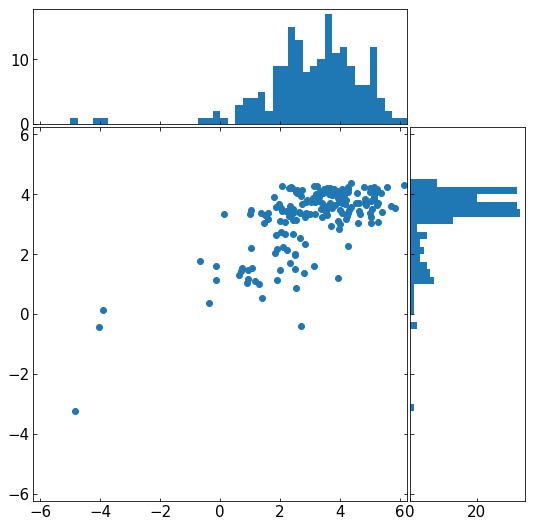

In [34]:
## same figures as above but in one plot
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True, labelsize=15)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False, labelsize=15)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False, labelsize=15)

# the scatter plot:
ax_scatter.scatter(y_test, y_pred)

# now determine nice limits by hand:
binwidth = 0.25
lim = np.ceil(np.abs([y_test, y_pred]).max() / binwidth) * binwidth
ax_scatter.set_xlim((-lim, lim))
ax_scatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(y_test, bins=bins)
ax_histy.hist(y_pred, bins=bins, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()

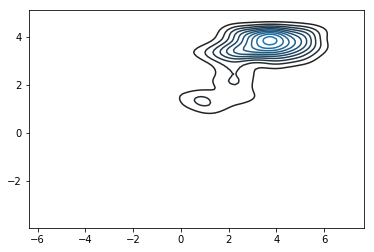

In [35]:
sns.kdeplot(y_test, y_pred)